# Deep Learning Project

## Wine Quality Prediction (Multi-class classification)

In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,r2_score,mean_squared_error

In [2]:
# call csv file and convert it to dataframe using Pandas function

df3=pd.read_csv('winequalitynew.csv')

# .head() will give the first 5 rows of the dataset by default

df3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# .info() will give basic info about the dataset

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [4]:
df3.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


In [5]:
# .shape will give number of rows and columns respectively

df3.shape

(1596, 12)

### Exploratory Data Analysis

In [6]:
# isnull().sum() gives the count of null values present in each column

df3.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

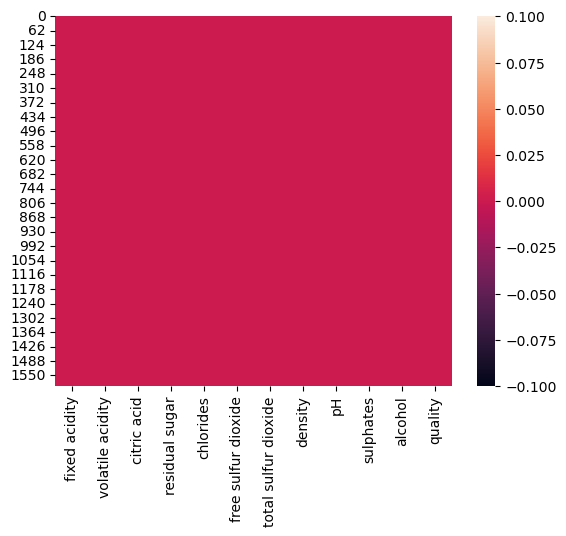

In [7]:
# plot heatmap to find null values present in the dataframe

sns.heatmap(df3.isnull())

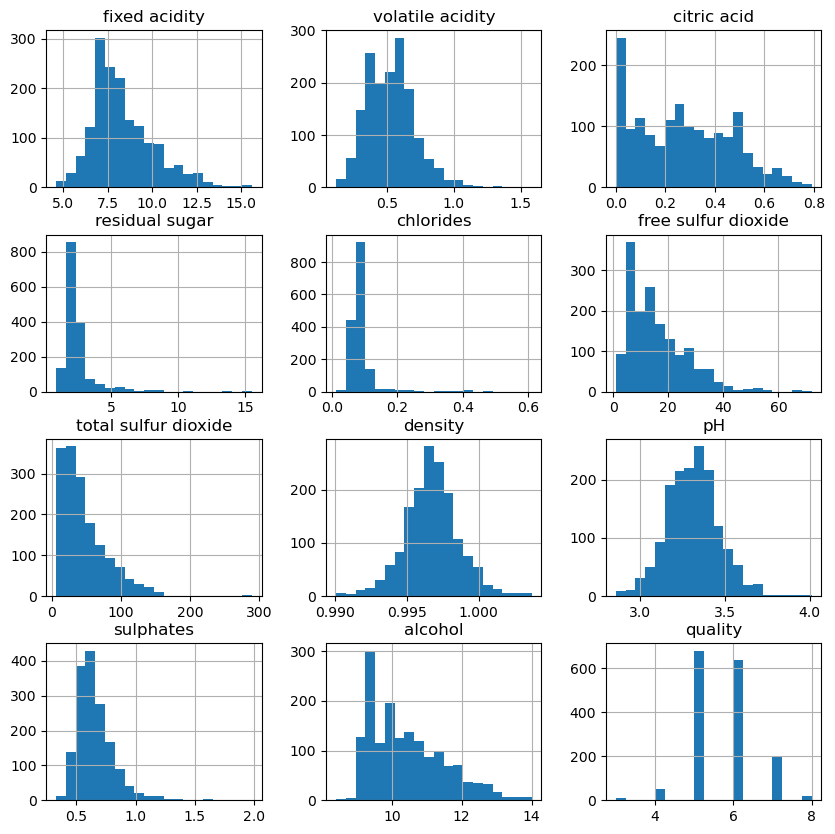

In [8]:
# draw the histogram to visualise the distribution of the data with continuous values in the columns of the dataset.

df3.hist(bins=20, figsize=(10, 10))
plt.show()

In [9]:
df3["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<AxesSubplot:xlabel='quality', ylabel='count'>

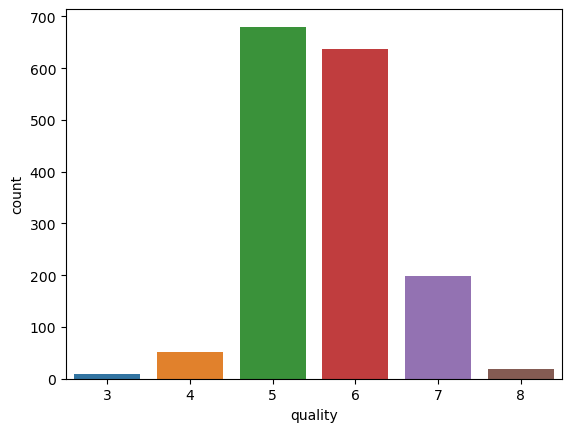

In [10]:
# draw the count plot to visualise the number data for each quality of wine.

sns.countplot(data=df3,x="quality")

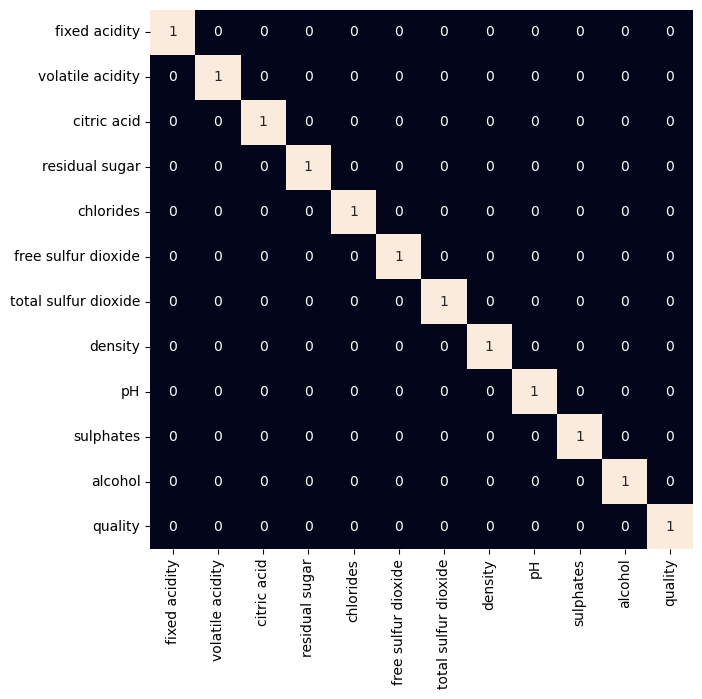

In [11]:
plt.figure(figsize=(7, 7))
sns.heatmap(df3.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [12]:
# split our features and target in x and y respectively 

x=df3.iloc[:,:-1]
y=df3.iloc[:,-1]

In [13]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [14]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1591    5
1592    6
1593    6
1594    5
1595    6
Name: quality, Length: 1596, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

en=LabelEncoder()
y=en.fit_transform(y)

In [16]:
y

array([2, 2, 2, ..., 3, 2, 3], dtype=int64)

In [17]:
x.shape

(1596, 11)

In [18]:
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.527910,0.960506,-1.394369,-0.452330,-0.245811,-0.464595,-0.377175,0.559577,1.292140,-0.591296,-0.963311
1,-0.296918,1.965419,-1.394369,0.045864,0.240520,0.874186,0.628039,0.029638,-0.730063,0.144874,-0.585966
2,-0.296918,1.295477,-1.188007,-0.167648,0.107884,-0.082086,0.232046,0.135626,-0.338669,-0.039169,-0.585966
3,1.666516,-1.384292,1.494706,-0.452330,-0.267917,0.109168,0.414812,0.665565,-0.990992,-0.468601,-0.585966
4,-0.527910,0.960506,-1.394369,-0.452330,-0.245811,-0.464595,-0.377175,0.559577,1.292140,-0.591296,-0.963311


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [20]:
# split the data for training and testing

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [21]:
model=Sequential()
model.add(Dense(1024,activation="relu",input_dim=11))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(6,activation="softmax"))

In [22]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")

In [23]:
his=model.fit(xtrain,ytrain,epochs=50,batch_size=200)

Epoch 1/50
6/6 [==============================] - 1s 16ms/step - loss: 1.5986 - accuracy: 0.3536
Epoch 2/50
6/6 [==============================] - 0s 10ms/step - loss: 1.2192 - accuracy: 0.5372
Epoch 3/50
6/6 [==============================] - 0s 13ms/step - loss: 1.0990 - accuracy: 0.5613
Epoch 4/50
6/6 [==============================] - 0s 13ms/step - loss: 1.0275 - accuracy: 0.5640
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 1.0196 - accuracy: 0.5667
Epoch 6/50
6/6 [==============================] - 0s 11ms/step - loss: 0.9779 - accuracy: 0.5909
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 0.9558 - accuracy: 0.6061
Epoch 8/50
6/6 [==============================] - 0s 13ms/step - loss: 0.9323 - accuracy: 0.6115
Epoch 9/50
6/6 [==============================] - 0s 13ms/step - loss: 0.9323 - accuracy: 0.5989
Epoch 10/50
6/6 [==============================] - 0s 13ms/step - loss: 0.9153 - accuracy: 0.6079
Epoch 11/50
6/6 [=============

In [24]:
his.history["loss"]

[1.5985742807388306,
 1.2192264795303345,
 1.0990239381790161,
 1.0275427103042603,
 1.0195618867874146,
 0.9778688549995422,
 0.9558177590370178,
 0.9323015809059143,
 0.9322930574417114,
 0.9153008460998535,
 0.8868661522865295,
 0.8807466626167297,
 0.8489855527877808,
 0.8481696844100952,
 0.8285951018333435,
 0.8210949301719666,
 0.7880850434303284,
 0.7946338653564453,
 0.7868354320526123,
 0.7567744255065918,
 0.7232153415679932,
 0.7022761702537537,
 0.6897788047790527,
 0.6504468321800232,
 0.652962327003479,
 0.6167049407958984,
 0.601858377456665,
 0.578414261341095,
 0.5682830214500427,
 0.5206387639045715,
 0.5352674126625061,
 0.5296274423599243,
 0.4933347702026367,
 0.445252388715744,
 0.4336652457714081,
 0.4347154498100281,
 0.3840210735797882,
 0.36523115634918213,
 0.39751753211021423,
 0.4009624719619751,
 0.3887801170349121,
 0.3460901081562042,
 0.2968745529651642,
 0.2803800404071808,
 0.33202672004699707,
 0.31832292675971985,
 0.2989347577095032,
 0.2459015697

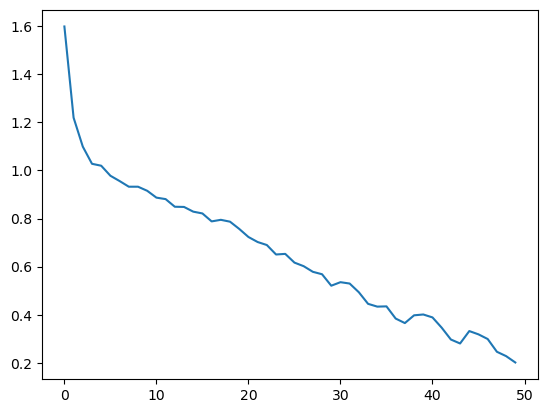

In [25]:
plt.plot(his.history['loss'])

In [26]:
ypred=model.predict(xtest)
ypred

15/15 [==============================] - 0s 3ms/step


array([[6.5743268e-05, 2.8209650e-05, 9.9204081e-01, 5.4747961e-03,
        2.3897958e-03, 5.8657469e-07],
       [1.7870902e-05, 4.8415091e-06, 9.4076052e-02, 9.0581959e-01,
        8.1409897e-05, 2.4046389e-07],
       [1.4557431e-03, 1.1085472e-04, 1.8698057e-02, 1.9169832e-03,
        9.7365159e-01, 4.1668084e-03],
       ...,
       [5.7543931e-03, 2.6994050e-03, 8.9250095e-02, 3.0946878e-01,
        1.8659765e-01, 4.0622967e-01],
       [1.2575396e-02, 5.0412379e-02, 9.3272698e-01, 4.0136403e-03,
        2.6332680e-04, 8.1772714e-06],
       [2.8577106e-04, 3.1008727e-05, 9.7925341e-01, 1.1553658e-03,
        1.9254485e-02, 1.9934165e-05]], dtype=float32)

In [27]:
ypred=np.argmax(ypred,axis=1)
ypred

array([2, 3, 4, 3, 3, 4, 4, 4, 2, 3, 2, 2, 4, 4, 3, 2, 3, 3, 2, 2, 2, 0,
       2, 3, 2, 2, 4, 4, 2, 4, 3, 3, 4, 3, 4, 3, 2, 3, 2, 3, 3, 2, 3, 2,
       4, 3, 3, 3, 2, 2, 2, 4, 3, 2, 2, 3, 3, 2, 2, 2, 4, 4, 2, 2, 2, 2,
       4, 3, 2, 1, 3, 2, 3, 3, 2, 2, 3, 4, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 3, 3, 2, 3, 3, 3, 2, 4, 4, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 4, 2, 4, 3, 2, 3, 3, 4, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2,
       3, 2, 2, 2, 3, 2, 2, 3, 3, 4, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3,
       4, 3, 3, 2, 2, 3, 4, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       4, 2, 4, 2, 2, 4, 4, 2, 3, 4, 2, 2, 2, 2, 2, 2, 4, 3, 3, 3, 3, 3,
       3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2,
       4, 2, 3, 3, 2, 2, 2, 2, 4, 4, 3, 2, 3, 2, 4, 4, 4, 2, 3, 3, 2, 4,
       3, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2,
       3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2,

In [28]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        18
           2       0.72      0.78      0.75       212
           3       0.66      0.60      0.63       189
           4       0.49      0.65      0.56        54
           5       0.00      0.00      0.00         4

    accuracy                           0.65       479
   macro avg       0.31      0.34      0.32       479
weighted avg       0.63      0.65      0.64       479



In [29]:
print(accuracy_score(ytest,ypred))

0.6534446764091858
